  Governorate  Homelessness  Addiction  Education  Health  Women Issues
0  Alexandria        0.0180      0.021      0.029  0.0205        0.0244
1       Aswan        0.0170      0.020      0.043  0.0205        0.0244
2       Asyut        0.0160      0.027      0.020  0.0205        0.0244
3     Beheira        0.0153      0.025      0.029  0.0200        0.0244
4   Beni Suef        0.0153      0.028      0.020  0.0205        0.0244


C:\Users\memom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\memom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\memom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\memom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

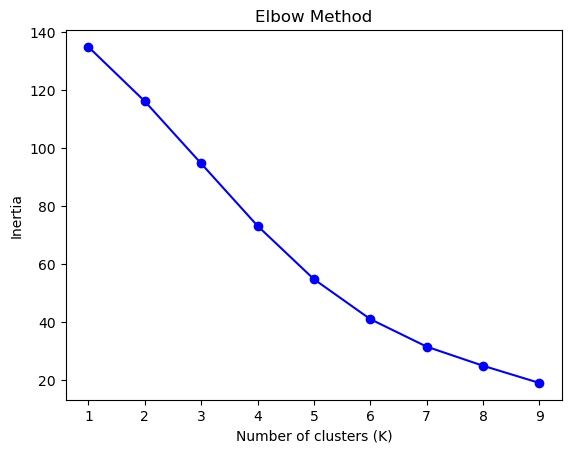

Cluster Summary:
               Homelessness  Addiction  Education    Health  Women Issues
Cluster_Label                                                            
High               0.014368   0.026000   0.026368  0.020395      0.024358
Low                0.019000   0.022000   0.026200  0.020100      0.024120
Medium             0.015767   0.022667   0.044667  0.020500      0.024400

تم حفظ الجدول باسم: Egypt_Governorates_Clusters.xlsx


C:\Users\memom\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

df = pd.read_excel(r"C:\Users\memom\Downloads\cluters.xlsx")

print(df.head())

features = ['Homelessness', 'Addiction', 'Education', 'Health', 'Women Issues']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

inertia = []
K_range = range(1, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

optimal_k = 3  
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_means = df.groupby('Cluster')[features].mean().sort_values(by='Addiction')
cluster_labels = {cluster_means.index[0]: 'Low',
                  cluster_means.index[1]: 'Medium',
                  cluster_means.index[2]: 'High'}

df['Cluster_Label'] = df['Cluster'].map(cluster_labels)

print("Cluster Summary:")
print(df.groupby('Cluster_Label')[features].mean())

df.to_excel('Egypt_Governorates_Clusters.xlsx', index=False)
print("\nتم حفظ الجدول باسم: Egypt_Governorates_Clusters.xlsx")


In [7]:
df.to_csv(r'C:\Users\memom\Egypt_Governorates_Clusters.csv', index=False, encoding='utf-8-sig')



In [8]:
print(df.groupby('Cluster_Label')[['Homelessness', 'Addiction', 'Education', 'Health', 'Women Issues']].mean())


               Homelessness  Addiction  Education    Health  Women Issues
Cluster_Label                                                            
High               0.014368   0.026000   0.026368  0.020395      0.024358
Low                0.019000   0.022000   0.026200  0.020100      0.024120
Medium             0.015767   0.022667   0.044667  0.020500      0.024400
